In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.1 MB/s eta 0:

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
df_train

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

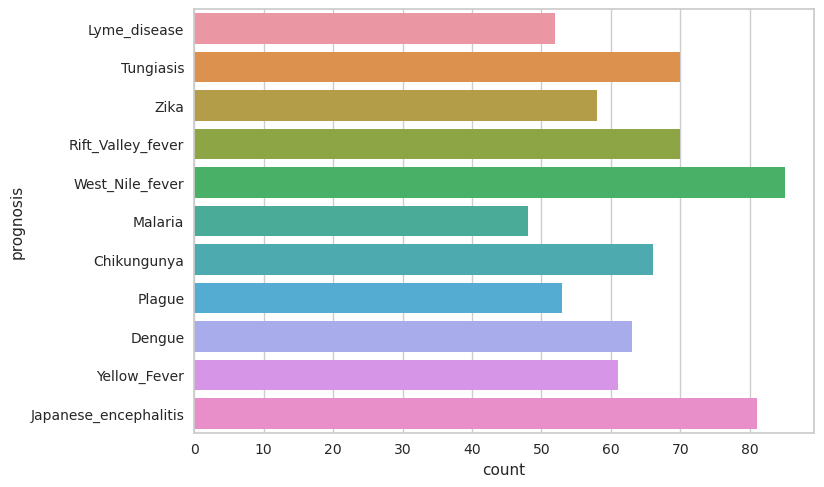

In [5]:
fig = sns.countplot(data=df_train, y='prognosis')


In [6]:
s = setup(df_train, target = 'prognosis', session_id = 123, ignore_features=['id'])

,Description,Value
0,Session id,123
1,Target,prognosis
2,Target type,Multiclass
3,Target mapping,"Chikungunya: 0, Dengue: 1, Japanese_encephalitis: 2, Lyme_disease: 3, Malaria: 4, Plague: 5, Rift_Valley_fever: 6, Tungiasis: 7, West_Nile_fever: 8, Yellow_Fever: 9, Zika: 10"
4,Original data shape,"(707, 66)"
5,Transformed data shape,"(707, 65)"
6,Transformed train set shape,"(494, 65)"
7,Transformed test set shape,"(213, 65)"
8,Ignore features,1
9,Numeric features,64


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.3298,0.7646,0.3298,0.3257,0.3109,0.2605,0.2634,20.1390
rf,Random Forest Classifier,0.3218,0.7557,0.3218,0.2920,0.2959,0.2515,0.2544,0.4260
lda,Linear Discriminant Analysis,0.3198,0.7186,0.3198,0.3084,0.2990,0.2496,0.2523,0.0630
xgboost,Extreme Gradient Boosting,0.3094,0.7425,0.3094,0.3138,0.3004,0.2388,0.2408,1.0470
lightgbm,Light Gradient Boosting Machine,0.3093,0.7432,0.3093,0.2976,0.2949,0.2381,0.2407,1.4440
ridge,Ridge Classifier,0.3058,0.0000,0.3058,0.2810,0.2721,0.2330,0.2362,0.0450
lr,Logistic Regression,0.3056,0.7185,0.3056,0.2835,0.2845,0.2339,0.2358,0.6090
et,Extra Trees Classifier,0.3013,0.7521,0.3013,0.2958,0.2857,0.2288,0.2314,0.3900
gbc,Gradient Boosting Classifier,0.2993,0.7258,0.2993,0.3073,0.2892,0.2257,0.2278,1.8200
svm,SVM - Linear Kernel,0.2815,0.0000,0.2815,0.2838,0.2646,0.2083,0.2125,0.1200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [8]:
cat = create_model('catboost')
cat_tunned = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.7916,0.4000,0.3564,0.3690,0.3363,0.3390
1,0.2600,0.7357,0.2600,0.2593,0.2486,0.1865,0.1890
2,0.3600,0.7571,0.3600,0.3539,0.3379,0.2948,0.2987
3,0.3600,0.7987,0.3600,0.4024,0.3571,0.2914,0.2978
4,0.3061,0.7502,0.3061,0.3387,0.3112,0.2354,0.2370
5,0.3265,0.7606,0.3265,0.3241,0.3103,0.2579,0.2602
6,0.3265,0.7413,0.3265,0.2591,0.2864,0.2552,0.2574
7,0.3265,0.7800,0.3265,0.2893,0.2980,0.2586,0.2604
8,0.3061,0.7514,0.3061,0.2998,0.2882,0.2312,0.2329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.8100,0.4000,0.3751,0.3640,0.3357,0.3412
1,0.2800,0.7186,0.2800,0.3273,0.2753,0.2084,0.2129
2,0.3800,0.7473,0.3800,0.3183,0.3269,0.3148,0.3226
3,0.3200,0.7814,0.3200,0.3317,0.3147,0.2458,0.2502
4,0.3265,0.7924,0.3265,0.3325,0.3109,0.2569,0.2595
5,0.2857,0.7724,0.2857,0.2906,0.2524,0.2108,0.2138
6,0.3469,0.7655,0.3469,0.3058,0.3130,0.2784,0.2814
7,0.3673,0.7791,0.3673,0.2961,0.3229,0.3003,0.3040
8,0.3673,0.7668,0.3673,0.3030,0.3154,0.2984,0.3062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
rf = create_model('rf')
rf_tunned = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3400,0.7382,0.3400,0.2951,0.3125,0.2715,0.2736
1,0.3000,0.7455,0.3000,0.2655,0.2693,0.2318,0.2368
2,0.4000,0.7574,0.4000,0.4050,0.3813,0.3380,0.3417
3,0.3000,0.7705,0.3000,0.2925,0.2821,0.2257,0.2304
4,0.2653,0.7390,0.2653,0.2648,0.2555,0.1934,0.1960
5,0.2857,0.7597,0.2857,0.2493,0.2627,0.2075,0.2097
6,0.2857,0.7458,0.2857,0.2702,0.2660,0.2079,0.2095
7,0.3673,0.8021,0.3673,0.2944,0.3239,0.3016,0.3034
8,0.3265,0.7254,0.3265,0.2810,0.3004,0.2552,0.2572


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3800,0.8043,0.3800,0.3332,0.3357,0.3187,0.3288
1,0.2600,0.7214,0.2600,0.2240,0.2252,0.1907,0.2000
2,0.3000,0.7580,0.3000,0.1959,0.2265,0.2318,0.2399
3,0.3400,0.7735,0.3400,0.3448,0.3249,0.2750,0.2806
4,0.3673,0.7859,0.3673,0.3406,0.3331,0.3070,0.3125
5,0.3061,0.7561,0.3061,0.2318,0.2477,0.2413,0.2489
6,0.2857,0.7593,0.2857,0.2426,0.2556,0.2173,0.2218
7,0.3469,0.7917,0.3469,0.2202,0.2651,0.2840,0.2933
8,0.3878,0.7473,0.3878,0.3083,0.3231,0.3263,0.3358


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
lda = create_model('lda')
lda_tunned = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4200,0.7961,0.4200,0.4898,0.4212,0.3590,0.3619
1,0.2600,0.6501,0.2600,0.2507,0.2506,0.1854,0.1866
2,0.3400,0.7084,0.3400,0.3033,0.2998,0.2734,0.2778
3,0.2600,0.6620,0.2600,0.2422,0.2460,0.1832,0.1854
4,0.2857,0.7166,0.2857,0.2741,0.2656,0.2162,0.2183
5,0.2857,0.7488,0.2857,0.2701,0.2671,0.2126,0.2149
6,0.2449,0.6854,0.2449,0.1898,0.2114,0.1634,0.1658
7,0.3673,0.7531,0.3673,0.3345,0.3377,0.3019,0.3046
8,0.3878,0.7099,0.3878,0.4156,0.3700,0.3213,0.3262


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.8057,0.4000,0.4344,0.3821,0.3377,0.3412
1,0.3000,0.6811,0.3000,0.3111,0.2973,0.2304,0.2319
2,0.3400,0.7229,0.3400,0.2933,0.2990,0.2734,0.2771
3,0.2800,0.7214,0.2800,0.2955,0.2823,0.2081,0.2104
4,0.3469,0.7369,0.3469,0.3330,0.3242,0.2830,0.2858
5,0.3265,0.7627,0.3265,0.2918,0.2978,0.2583,0.2605
6,0.2449,0.7087,0.2449,0.1656,0.1938,0.1614,0.1674
7,0.3469,0.7606,0.3469,0.2781,0.3000,0.2797,0.2819
8,0.4082,0.7348,0.4082,0.3827,0.3824,0.3458,0.3498


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
blender = blend_models([cat_tunned, rf_tunned, lda_tunned])
tuned_blender = tune_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3600,0.8101,0.3600,0.3592,0.3453,0.2942,0.2971
1,0.3200,0.7138,0.3200,0.3284,0.3059,0.2541,0.2575
2,0.3400,0.7459,0.3400,0.3033,0.3035,0.2731,0.2766
3,0.2800,0.7451,0.2800,0.2679,0.2714,0.2084,0.2105
4,0.3469,0.7878,0.3469,0.3133,0.3124,0.2830,0.2864
5,0.3061,0.7768,0.3061,0.2433,0.2653,0.2358,0.2380
6,0.2857,0.7381,0.2857,0.2109,0.2349,0.2100,0.2153
7,0.3469,0.7725,0.3469,0.2821,0.3007,0.2804,0.2826
8,0.4082,0.7691,0.4082,0.3724,0.3766,0.3461,0.3504


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3600,0.8131,0.3600,0.3574,0.3435,0.2942,0.2981
1,0.3200,0.7156,0.3200,0.3199,0.2988,0.2557,0.2613
2,0.3400,0.7486,0.3400,0.2921,0.2965,0.2728,0.2770
3,0.3000,0.7593,0.3000,0.2967,0.2936,0.2287,0.2300
4,0.3469,0.7920,0.3469,0.3138,0.3126,0.2837,0.2878
5,0.3265,0.7771,0.3265,0.2507,0.2773,0.2596,0.2631
6,0.3061,0.7469,0.3061,0.2778,0.2704,0.2333,0.2376
7,0.3673,0.7771,0.3673,0.2957,0.3174,0.3032,0.3057
8,0.4082,0.7691,0.4082,0.3424,0.3610,0.3467,0.3529


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
final_model = finalize_model(tuned_blender)

In [13]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
ids = df_test['id']
df_test = df_test.drop('id', axis=1)

In [15]:
pred = predict_model(final_model, df_test, raw_score=True)
indices = np.argsort(-pred.loc[:,pred.columns[-11:]])
ind = indices.apply(lambda x: [i for i in x],axis=1)

In [16]:
col = np.array([i[17:] for i in pred.loc[2,pred.columns[-11:]].index])
result = [' '.join(x) for x in[col[row][:3] for row in ind]]

In [17]:
submission = pd.DataFrame({'id':ids,'prognosis':result})
submission.to_csv('submission.csv',index=False)